<a href="https://colab.research.google.com/github/barkhamathur78/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture6/submissions/BarkhaM__Lecture_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Activity #1 : Using RDDs with Wejo Data in Pyspark***

In [ ]:
#install pyspark
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=b8ccbdf279a7029e17770a3bdd4f1966bf96aaa36e453f0a0bddc785e75de15f
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [5]:
#Create Spark Session:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("RDD_Wejo").getOrCreate()
sc = spark.sparkContext


In [6]:
#Load the Data as an RDD:
rdd = sc.textFile("/content/wejo.json")


In [ ]:
#Inspect the First Few Rows
rdd.take(3)


['{"dataPointId":"02d77c7e-1ac8-45bc-978f-7c3855f5ff9b","journeyId":"2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc","capturedTimestamp":"2023-04-12T19:00:04.000-0500","location":{"latitude":42.497317,"longitude":-90.740595,"geohash":"9zx3z0","postalCode":"52002","regionCode":"IA","countryCode":"US"},"metrics":{"speed":38.01,"heading":359.0},"vehicle":{"wejoVehicleTypeId":8905611058720503136,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"03fde858-5922-446a-b68a-00167b866c6e","journeyId":"1183a6bfb3178ba00a4a8585aca72db2d4e689ad","capturedTimestamp":"2023-04-12T19:00:21.000-0500","location":{"latitude":41.658504,"longitude":-93.500216,"geohash":"9zmsbr","postalCode":"50009","regionCode":"IA","countryCode":"US"},"metrics":{"speed":41.47,"heading":90.0},"vehicle":{"wejoVehicleTypeId":-5486746399762838414,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"04ce2a2c-d0fd-4197-9416-9324c9a5106c","journeyId":"1c96529d9ccf86042ca98744b3f3b710c247b67d","capturedTimestamp"

In [7]:
#Parse JSON Strings into Python Dictionaries
import json
rdd_parsed = rdd.map(lambda x: json.loads(x))


In [8]:
#Extract Key Information (latitude, longitude, speed)
rdd_location_speed = rdd_parsed.map(lambda x: (x['location']['latitude'], x['location']['longitude'], x['metrics']['speed']))
rdd_location_speed.take(5)


[(42.497317, -90.740595, 38.01),
 (41.658504, -93.500216, 41.47),
 (41.515211, -94.232996, 36.86),
 (42.502249, -96.410195, 14.97),
 (41.5958361, -93.73612159999999, 0.0)]

In [9]:
#Filter Data Points with Speed > 30 mph
rdd_filtered = rdd_location_speed.filter(lambda x: x[2] > 30)
rdd_filtered.take(5)


[(42.497317, -90.740595, 38.01),
 (41.658504, -93.500216, 41.47),
 (41.515211, -94.232996, 36.86),
 (42.0185, -93.62851, 64.51),
 (41.555452, -93.633866, 55.29)]

In [10]:
#Count the Number of Data Points with Speed > 30 mph
speed_count = rdd_filtered.count()
print(f"Number of points with speed > 30 mph: {speed_count}")


Number of points with speed > 30 mph: 2395


In [11]:
#Collect and Display Filtered Data Points
filtered_data = rdd_filtered.collect()
for data in filtered_data[:5]:
    print(data)


(42.497317, -90.740595, 38.01)
(41.658504, -93.500216, 41.47)
(41.515211, -94.232996, 36.86)
(42.0185, -93.62851, 64.51)
(41.555452, -93.633866, 55.29)


(42.497317, -90.740595, 38.01)
(41.658504, -93.500216, 41.47)
(41.515211, -94.232996, 36.86)
(42.0185, -93.62851, 64.51)
(41.555452, -93.633866, 55.29)


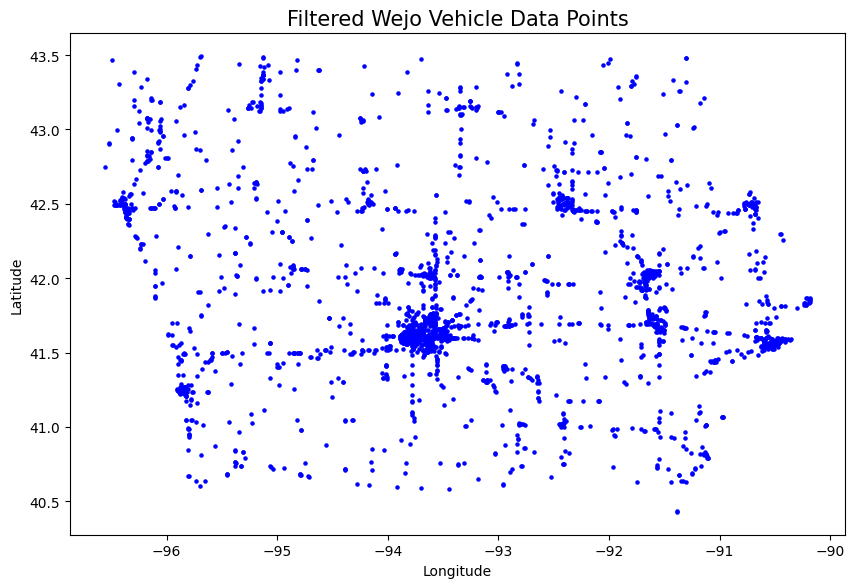

In [12]:
# plot the data using matplotlib

# Import required libraries for plotting
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create Point geometries for the latitude and longitude
points = [Point(data[1], data[0]) for data in filtered_data]  # Longitude, Latitude

# Create a GeoDataFrame with CRS EPSG:4326 (WGS84)
gdf = gpd.GeoDataFrame(geometry=points, crs="EPSG:4326")

# Plot the points
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='blue', marker='o', markersize=5)

# Set plot title and labels
ax.set_title("Filtered Wejo Vehicle Data Points", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# ***Activity #2: Introduction to Pyspark***

In [14]:
#load apple_stock.csv into pyspark and explore the data

# Load the CSV file into a DataFrame
apple_df = spark.read.csv("/content/apple_stock.csv", header=True, inferSchema=True)

# Show the first 20 rows of the DataFrame
apple_df.show(20)

# Print the schema of the DataFrame
apple_df.printSchema()

# Get the number of rows in the DataFrame
print(f"Number of rows: {apple_df.count()}")

# Perform some basic descriptive statistics
apple_df.describe().show()


+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [15]:
# Select key columns DAte, Open , close, volume

# Select specific columns
selected_columns_df = apple_df.select("Date", "Open", "Close", "Volume")

# Show the selected columns
selected_columns_df.show()


+----------+------------------+------------------+---------+
|      Date|              Open|             Close|   Volume|
+----------+------------------+------------------+---------+
|2010-01-04|        213.429998|        214.009998|123432400|
|2010-01-05|        214.599998|        214.379993|150476200|
|2010-01-06|        214.379993|        210.969995|138040000|
|2010-01-07|            211.75|            210.58|119282800|
|2010-01-08|        210.299994|211.98000499999998|111902700|
|2010-01-11|212.79999700000002|210.11000299999998|115557400|
|2010-01-12|209.18999499999998|        207.720001|148614900|
|2010-01-13|        207.870005|        210.650002|151473000|
|2010-01-14|210.11000299999998|            209.43|108223500|
|2010-01-15|210.92999500000002|            205.93|148516900|
|2010-01-19|        208.330002|        215.039995|182501900|
|2010-01-20|        214.910006|            211.73|153038200|
|2010-01-21|        212.079994|        208.069996|152038600|
|2010-01-22|206.78000600

In [16]:
# calculate daily price change

# Calculate the daily price change (Close - Open)
daily_price_change_df = apple_df.withColumn("DailyPriceChange", apple_df["Close"] - apple_df["Open"])

# Show the DataFrame with the new column
daily_price_change_df.select("Date", "Open", "Close", "DailyPriceChange").show()


+----------+------------------+------------------+--------------------+
|      Date|              Open|             Close|    DailyPriceChange|
+----------+------------------+------------------+--------------------+
|2010-01-04|        213.429998|        214.009998|  0.5799999999999841|
|2010-01-05|        214.599998|        214.379993|-0.22000499999998624|
|2010-01-06|        214.379993|        210.969995| -3.4099980000000016|
|2010-01-07|            211.75|            210.58| -1.1699999999999875|
|2010-01-08|        210.299994|211.98000499999998|   1.680010999999979|
|2010-01-11|212.79999700000002|210.11000299999998| -2.6899940000000413|
|2010-01-12|209.18999499999998|        207.720001| -1.4699939999999856|
|2010-01-13|        207.870005|        210.650002|  2.7799970000000087|
|2010-01-14|210.11000299999998|            209.43| -0.6800029999999708|
|2010-01-15|210.92999500000002|            205.93|  -4.999995000000013|
|2010-01-19|        208.330002|        215.039995|   6.709992999

In [17]:
# Calculate average daily volume

average_volume = apple_df.select("Volume").agg({"Volume": "avg"}).collect()[0][0]
print(f"Average Daily Volume: {average_volume}")


Average Daily Volume: 94225775.87968218


In [18]:
# prompt: Find Maximum and minimum closing Price

# Find the maximum closing price
max_closing_price = apple_df.agg({"Close": "max"}).collect()[0][0]
print(f"Maximum Closing Price: {max_closing_price}")

# Find the minimum closing price
min_closing_price = apple_df.agg({"Close": "min"}).collect()[0][0]
print(f"Minimum Closing Price: {min_closing_price}")


Maximum Closing Price: 702.100021
Minimum Closing Price: 90.279999


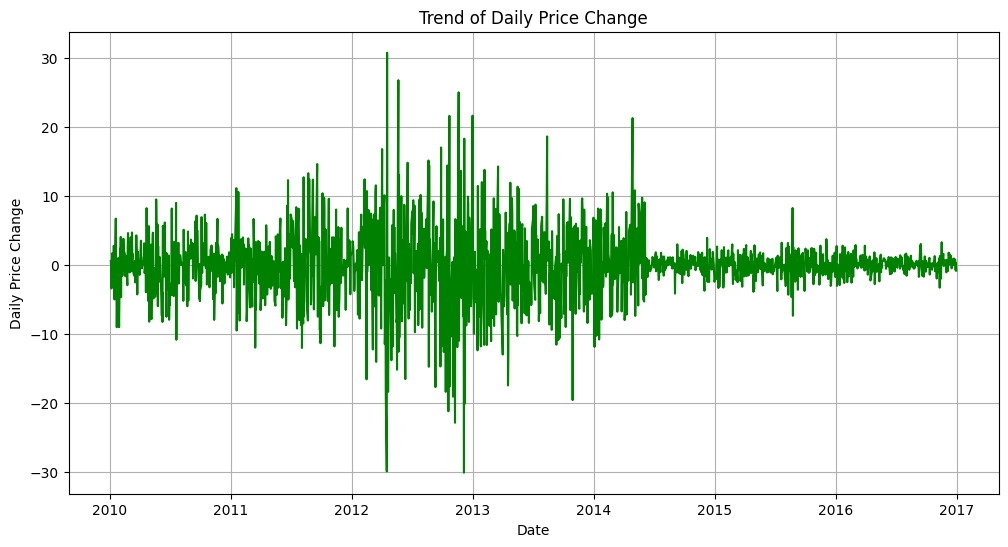

In [24]:
# plot trends for daily price
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_price_change_df' is the DataFrame with the 'DailyPriceChange' column
price_change_data = daily_price_change_df.select("Date", "DailyPriceChange").toPandas()

# Convert 'Date' to datetime objects for better plotting
price_change_data['Date'] = pd.to_datetime(price_change_data['Date'])

# Plot the trend of daily price change
plt.figure(figsize=(12, 6))
plt.plot(price_change_data['Date'], price_change_data['DailyPriceChange'], color='green')
plt.xlabel("Date")
plt.ylabel("Daily Price Change")
plt.title("Trend of Daily Price Change")
plt.grid(True)
plt.show()
